In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CSV_DATA = Path().cwd().parent.parent / "data/1_transformed"

In [2]:
df = pd.read_csv(CSV_DATA/'summary/ride_summary.csv')
df['start_date'] = pd.to_datetime(df['start_date'])
df['start_time'] = pd.to_timedelta(df['start_time'])
df['end_time'] = pd.to_timedelta(df['end_time'])

In [3]:
df.head()

,ride_id,start_date,start_time,end_time,biker_weight_lbs,bike_weight,bag_weight,avg_speed,avg_cruising_speed,total_ride_time_sec,total_moving_time_sec,total_distance_mi,total_ascent_ft,total_descent_ft,avg_heart_rate,avg_power,avg_cadence,avg_ambient_temp_F,best_power_4s,best_power_5s,best_power_10s,best_power_20s,best_power_30s,best_power_1m,best_power_2m,best_power_3m,best_power_4m,best_power_5m,best_power_6m,best_power_10m,best_power_20m,best_power_30m,best_power_40m,best_power_1h,best_power_2h
0,0x5b086853,2018-05-25,0 days 19:47:31,0 days 20:27:31,220,35,0,13.720594,14.267175,2401.0,1736.0,6.991217,220.1551,237.8725,NaN,119.731068,NaN,NaN,672.602587,667.914386,629.656660,514.425348,410.461476,303.697449,224.933753,198.493162,179.981622,180.681178,183.201559,153.455322,143.166693,121.926138,NaN,NaN,NaN
1,0x5b3c1e5a,2018-07-04,0 days 01:09:46,0 days 01:42:05,220,35,0,13.615799,14.215438,1940.0,1737.0,6.994353,152.5665,180.1269,NaN,108.186147,NaN,NaN,528.072743,521.385666,483.860170,376.223200,296.104667,242.541335,194.185269,168.695252,166.227917,154.582374,149.646974,142.407923,119.830925,110.822400,NaN,NaN,NaN
2,0x5ccb413c,2019-05-02,0 days 19:13:00,0 days 19:53:00,220,35,0,13.784195,14.574504,2401.0,2143.0,8.865922,300.5396,300.5396,NaN,125.528392,NaN,NaN,485.282271,481.991827,462.283537,412.144319,391.244346,314.816769,209.581472,186.631718,179.636006,157.569641,155.009664,142.368486,134.442850,130.264839,NaN,NaN,NaN
3,0x5cccc63c,2019-05-03,0 days 22:52:44,0 days 23:53:54,220,35,0,11.228317,12.081964,3671.0,2725.0,9.516836,333.3496,280.1974,NaN,87.191110,NaN,NaN,432.549324,425.735809,389.502414,330.267900,299.166732,225.907473,143.793900,147.597113,129.794118,118.283785,115.819729,107.256435,98.405537,97.000798,94.003892,NaN,NaN
4,0x5cdbff9c,2019-05-15,0 days 12:01:32,0 days 12:37:36,220,35,0,14.256866,14.701154,2165.0,1942.0,8.029630,255.2618,211.2964,NaN,133.975528,NaN,NaN,422.177957,419.814683,393.709515,363.263188,336.841737,271.435198,215.164384,187.689124,188.538262,164.696769,157.267499,154.668660,139.481512,138.606140,NaN,NaN,NaN


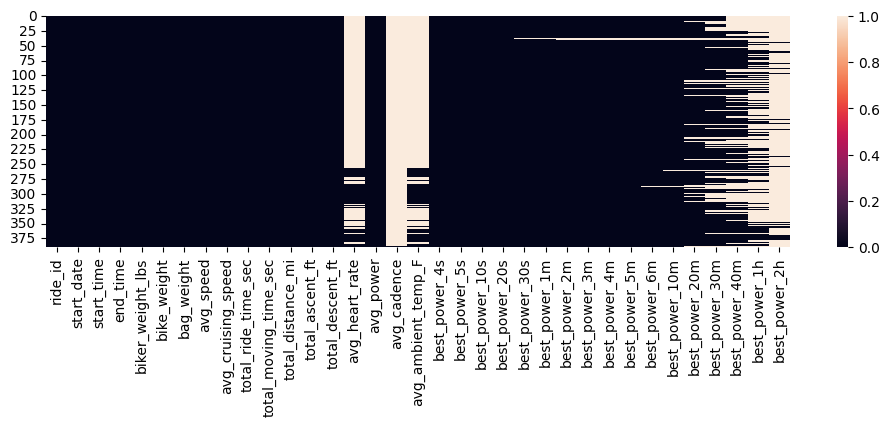

In [4]:
# Check for nulls in sensor columns
_ = plt.figure(figsize=(12,3))
_ = sns.heatmap(df.isna())

In [5]:
total_rides = df.shape[0]
rides_with_watch = total_rides - df['avg_heart_rate'].isna().sum()
percent_with_watch = 100.0* (rides_with_watch / total_rides)
print(f'Of the total {total_rides} rides, only {rides_with_watch} of them have watch sensor data ({round(percent_with_watch,2)}%)')

Of the total 390 rides, only 85 of them have watch sensor data (21.79%)


In [6]:
df_watch_rides = df.loc[~df['avg_heart_rate'].isna(),:].reset_index(drop=True)
df_watch_rides.tail(50)

,ride_id,start_date,start_time,end_time,biker_weight_lbs,bike_weight,bag_weight,avg_speed,avg_cruising_speed,total_ride_time_sec,total_moving_time_sec,total_distance_mi,total_ascent_ft,total_descent_ft,avg_heart_rate,avg_power,avg_cadence,avg_ambient_temp_F,best_power_4s,best_power_5s,best_power_10s,best_power_20s,best_power_30s,best_power_1m,best_power_2m,best_power_3m,best_power_4m,best_power_5m,best_power_6m,best_power_10m,best_power_20m,best_power_30m,best_power_40m,best_power_1h,best_power_2h
35,0x6468f0a8,2023-05-20,0 days 16:09:12,0 days 16:30:44,220,25,0,11.061266,14.133765,1293.0,951.0,3.927581,77.4316,139.1144,115.238226,81.322951,NaN,78.373312,311.684541,308.409863,277.681726,211.172451,183.492624,166.380329,143.866478,141.971920,136.839677,130.981763,124.411549,119.668842,84.843034,NaN,NaN,NaN,NaN
36,0x646aaca8,2023-05-21,0 days 23:43:36,0 days 00:09:52,220,25,0,15.103680,15.833085,1577.0,1485.0,6.621010,135.8334,95.1490,128.349081,149.214193,NaN,73.584337,327.672176,325.554630,308.519194,270.157082,232.976474,202.338007,186.629579,181.616482,180.246502,181.630664,178.478202,171.888636,167.158304,NaN,NaN,NaN,NaN
37,0x646d330d,2023-05-23,0 days 21:41:33,0 days 22:23:58,220,25,0,11.602788,15.014983,2546.0,633.0,2.797789,95.1490,249.3560,122.379469,108.871589,NaN,89.607266,374.893053,371.820206,344.318809,270.760888,232.582538,197.645011,184.560234,170.305314,162.304203,151.283446,141.442139,104.086764,NaN,NaN,NaN,NaN,NaN
38,0x647bd17f,2023-06-03,0 days 23:49:19,0 days 00:19:25,220,25,0,13.571056,15.306218,1807.0,1354.0,5.865865,94.4928,108.9292,137.512853,112.918896,NaN,83.633162,254.412321,253.756277,248.295475,229.480880,218.291712,201.879847,193.786696,190.289656,188.111435,186.760745,181.841107,167.559876,118.617302,NaN,NaN,NaN,NaN
39,0x647fc3f0,2023-06-06,0 days 23:40:32,0 days 00:15:32,220,25,0,14.488376,14.973331,2101.0,1459.0,6.373484,131.2400,125.9904,137.498105,119.664949,NaN,80.616488,428.587974,424.905725,399.375819,383.099967,364.857266,229.840228,190.715163,184.934054,180.871366,176.266213,175.144839,168.818087,128.643756,NaN,NaN,NaN,NaN
40,0x64d5639c,2023-08-10,0 days 22:24:28,0 days 22:57:31,220,25,0,11.996846,13.030013,1984.0,1754.0,6.450010,395.6886,290.0404,154.274160,123.880013,NaN,84.654884,518.322241,513.873804,494.580899,450.055219,428.746952,374.943492,315.759492,251.194666,209.392606,185.254272,179.867618,156.805545,136.527028,130.826606,NaN,NaN,NaN
41,0x64d57601,2023-08-10,0 days 23:42:57,0 days 00:13:45,220,25,0,12.649477,14.009036,1849.0,1624.0,6.497055,269.0420,366.8158,149.452948,107.618618,NaN,80.845809,793.016948,781.973410,714.189332,532.196125,428.397883,342.965544,256.236241,213.326423,201.592674,189.357195,179.602492,151.515892,135.054522,108.776808,NaN,NaN,NaN
42,0x64d78b74,2023-08-12,0 days 13:39:00,0 days 14:12:13,220,25,0,14.246489,15.368782,1994.0,1302.0,5.643591,99.7424,96.4614,144.498948,128.072277,NaN,78.957153,422.430288,421.281505,413.842803,385.780256,340.379876,233.159238,189.525938,180.196919,167.461239,161.376631,159.404562,151.656405,130.062764,NaN,NaN,NaN,NaN
43,0x64e07c36,2023-08-19,0 days 08:24:22,0 days 12:34:29,220,25,0,12.310992,15.802431,187808.0,1342.0,6.022180,99.0862,192.2666,130.326803,112.884262,NaN,80.695060,275.934162,272.692210,256.634344,235.549410,227.942660,219.539905,205.918462,197.342462,195.272009,187.164707,174.924987,153.280256,131.925313,NaN,NaN,NaN,NaN
44,0x64ee48c6,2023-08-29,0 days 19:36:38,0 days 19:54:15,220,25,0,3.621121,11.805122,1058.0,207.0,0.728415,90.5556,183.7360,124.196823,19.857035,NaN,81.164365,208.293545,207.077386,196.917892,179.781142,171.522923,159.651801,88.921395,69.080379,59.902056,47.921645,39.934704,23.960822,NaN,NaN,NaN,NaN,NaN


In [7]:
df['ride_year'] = df['start_date'].dt.year
df['ride_month'] = df['start_date'].dt.month
df['ride_dow'] = df['start_date'].dt.day_name()

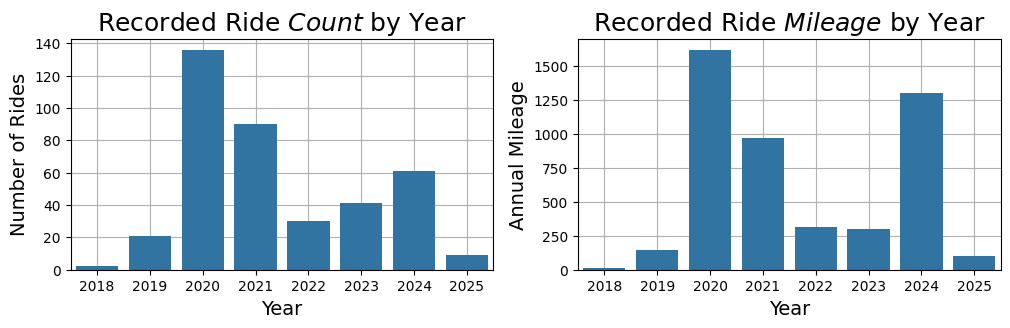

In [8]:
df_yearly_rides = df[['ride_year','total_distance_mi']].groupby('ride_year').count().rename(columns={'total_distance_mi':'ride_count'}).reset_index()
df_yearly_miles = df[['ride_year','total_distance_mi']].groupby('ride_year').sum().rename(columns={'total_distance_mi':'yearly_ride_mileage'}).reset_index()

fig, axes = plt.subplots(1,2, figsize=(12,3))
_ = sns.barplot(df_yearly_rides, x='ride_year', y='ride_count', ax=axes[0])
_ = sns.barplot(df_yearly_miles, x='ride_year', y='yearly_ride_mileage', ax=axes[1])
_ = axes[0].set_xlabel('Year', fontsize=14)
_ = axes[0].set_ylabel('Number of Rides', fontsize=14)
_ = axes[0].set_title('Recorded Ride $Count$ by Year', fontsize=18)
_ = axes[0].grid()
_ = axes[0].set_axisbelow(True)
_ = axes[1].set_xlabel('Year', fontsize=14)
_ = axes[1].set_ylabel('Annual Mileage', fontsize=14)
_ = axes[1].set_title('Recorded Ride $Mileage$ by Year', fontsize=18)
_ = axes[1].grid()
_ = axes[1].set_axisbelow(True)

In [9]:
df.total_distance_mi.sum()

np.float64(4762.263833227133)

## Ride Heatmap by Year

In [10]:
def get_year_activity_data_by_weekday(df:pd.DataFrame, filt_year:int, agg_column:str='total_distance_mi', agg_method:str='sum') -> pd.DataFrame:
    # Create an Aggregation of the selected column across the dates available from rides. Multiple rides can occur on a single day
    df_filt_year = df.copy().loc[df['ride_year']==filt_year,:]
    df_grouped = df_filt_year.groupby(['start_date','ride_dow'])[agg_column].agg(agg_method).reset_index()

    # Create a list of ALL dates in which rides could be done for the year
    all_year_dates = pd.DataFrame(pd.date_range(str(filt_year) + "-01-01", str(filt_year) + "-12-31", freq="D"), columns=['ride_date'])
    all_year_dates['day_of_week'] = all_year_dates['ride_date'].dt.day_name()
    df_total_dates = all_year_dates.merge(df_grouped, how='left', left_on='ride_date', right_on='start_date').fillna(0.0)
    #df_total_dates['ride_date'] = df_total_dates['ride_date'].dt.date

    return df_total_dates

    # Create a Pivot table for rides by date and dow
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    pivot_df = df_total_dates.pivot_table(index='ride_date', columns='day_of_week', values=agg_column, fill_value=0.0).reindex(columns=days_order)
    pivot_df= pivot_df.rename(columns={full:short for full,short in zip(days_order, ['M','T','W','Th','F','Sa','Su'])})

    pivot_df = pivot_df.reset_index()
    return pivot_df


In [11]:
df_activity_2020 = get_year_activity_data_by_weekday(df, filt_year=2020)
df_activity_2021 = get_year_activity_data_by_weekday(df, filt_year=2021)
df_activity_2022 = get_year_activity_data_by_weekday(df, filt_year=2022)
df_activity_2023 = get_year_activity_data_by_weekday(df, filt_year=2023)
df_activity_2024 = get_year_activity_data_by_weekday(df, filt_year=2024)

In [12]:
df_activity_2020

,ride_date,day_of_week,start_date,ride_dow,total_distance_mi
0,2020-01-01,Wednesday,0.0,0.0,0.000000
1,2020-01-02,Thursday,2020-01-02 00:00:00,Thursday,5.276248
2,2020-01-03,Friday,0.0,0.0,0.000000
3,2020-01-04,Saturday,0.0,0.0,0.000000
4,2020-01-05,Sunday,0.0,0.0,0.000000
...,...,...,...,...,...
361,2020-12-27,Sunday,0.0,0.0,0.000000
362,2020-12-28,Monday,0.0,0.0,0.000000
363,2020-12-29,Tuesday,2020-12-29 00:00:00,Tuesday,11.314947
364,2020-12-30,Wednesday,2020-12-30 00:00:00,Wednesday,9.745118


In [13]:
# cmap = plt.get_cmap('YlGn',10)
# cmap.set_under('grey')#Colour values less than vmin in grey
# cmap.set_over('green')# colour valued larger than vmax in green 

# _ = plt.figure(figsize=(10, 1.5))
# _ = sns.heatmap(df_activity_2024.set_index('ride_date').T, cmap=cmap, linewidths=0.0, linecolor='black', square=False, annot=False, cbar=False, vmin=0.005, vmax=50.0)
# _ = plt.title('Bike Ride Activity')
# _ = plt.xlabel('')
# _ = plt.ylabel('')

In [14]:
# pip install plotly-caplot 
# note: this could cause some package conflicts with numpy (previously 2.2.5) and pytz (previously  2025.2). 
# I made need to uninstall calplot to continue working as normal since calplot relies on older versions than described above
# ref: https://www.youtube.com/watch?v=U4gjFYvQafo
from plotly_calplot import calplot
# Also I need to install nbformat>=4.2.0

ModuleNotFoundError: No module named 'plotly_calplot'

In [ ]:
cmap = plt.get_cmap('YlGn',10)
list(sns.color_palette('YlGn',n_colors=10).as_hex())

['#f9fdc5',
 '#eaf7af',
 '#d2eda0',
 '#b1df90',
 '#8bce81',
 '#64bc6f',
 '#3fa85b',
 '#288a47',
 '#10743c',
 '#005e33']

In [ ]:
colorscale = list(sns.color_palette('YlGn',n_colors=10).as_hex())
colorscale = [(x,c) for x,c in zip(np.linspace(0.0,1.0,10), colorscale)]
colorscale[0] = (0.00, "#888888")

fig = calplot(df_activity_2024, x='ride_date', y='total_distance_mi', colorscale=colorscale, 
              dark_theme=True, gap=1, month_lines_width=4, month_lines_color='#000000',
            showscale=True, total_height=225, title='Ride Mileage 2024', cmap_max=70)
fig.show()

In [ ]:
fig = calplot(df_activity_2023, x='ride_date', y='total_distance_mi', colorscale=colorscale, 
              dark_theme=True, gap=1, month_lines_width=4, month_lines_color='#000000',
            showscale=True, total_height=225, title='Ride Mileage 2023', cmap_max=70)
fig.show()

In [ ]:
fig = calplot(df_activity_2022, x='ride_date', y='total_distance_mi', colorscale=colorscale, 
              dark_theme=True, gap=1, month_lines_width=4, month_lines_color='#000000',
            showscale=True, total_height=225, title='Ride Mileage 2022', cmap_max=70)
fig.show()

In [ ]:
fig = calplot(df_activity_2021, x='ride_date', y='total_distance_mi', colorscale=colorscale, 
              dark_theme=True, gap=1, month_lines_width=4, month_lines_color='#000000',
            showscale=True, total_height=225, title='Ride Mileage 2021', cmap_max=70)
fig.show()

In [ ]:
fig = calplot(df_activity_2020, x='ride_date', y='total_distance_mi', colorscale=colorscale, 
              dark_theme=True, gap=1, month_lines_width=4, month_lines_color='#000000',
            showscale=True, total_height=225, title='Ride Mileage 2020', cmap_max=70)
fig.show()